In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [91]:
def delta(lambda1, n, d):
    '''
    Compute the phase difference for the FPI transmission 
    (Following COLLAGE 2020 Lecture notes 7 from nso.edu)
    '''
    
    return (n * (2 * np.pi) / lambda1 * d)

def convert_delta_wavescale(delta, lambda1, d):
    lambdas = [dd * lambda1**2 /(2*np.pi*d) for dd in delta]
    return lambdas

def fabry_perot_profile_delta(delta_scale, R=0.99):
    '''
    Return FP transmission profile on a wavelength scale provided
    
    Inputs:
    wavescale -- wavescale the transmission profile to be calculated on 
    R         -- reflectance coefficient^2
    
    Return:
    transmission -- transmission profile of the FP
    '''
    
    F = 4 * R / (1- R**2) # Finesse of the Fabry-Perot etalon
    
    transmission_profile = [1/(1 + F*np.sin(dd)**2) for dd in 
                            delta_scale]
    
    return transmission_profile


def fabry_perot_profile(wavescale, R=0.99, lambda1=854.2e-9, n=1, d=1e-2):
    '''
    Return FP transmission profile on a wavelength scale provided
    
    Inputs:
    wavescale -- wavescale the transmission profile to be calculated on 
    R         -- reflectance coefficient^2
    lambda    -- wavelength of the incident light
    n         -- coefficient of refraction; default = 1 for air
    d         -- spacing between the plates 
    
    Return:
    transmission -- transmission profile of the FP
    '''
    
    R_coeff = 4 * R / (1- R**2)
    
    transmission_profile = [1/(1+R_coeff*np.sin(delta(l, n, d))**2) for l in 
                            wavescale]
    
    return transmission_profile

def calculate_free_spectral_range(lambda1=854.2, d=1e-2, n=1):
    '''
    Calculate the free spectral range for a FP
    '''
    
    return lambda1**2 / (2 * n * d)

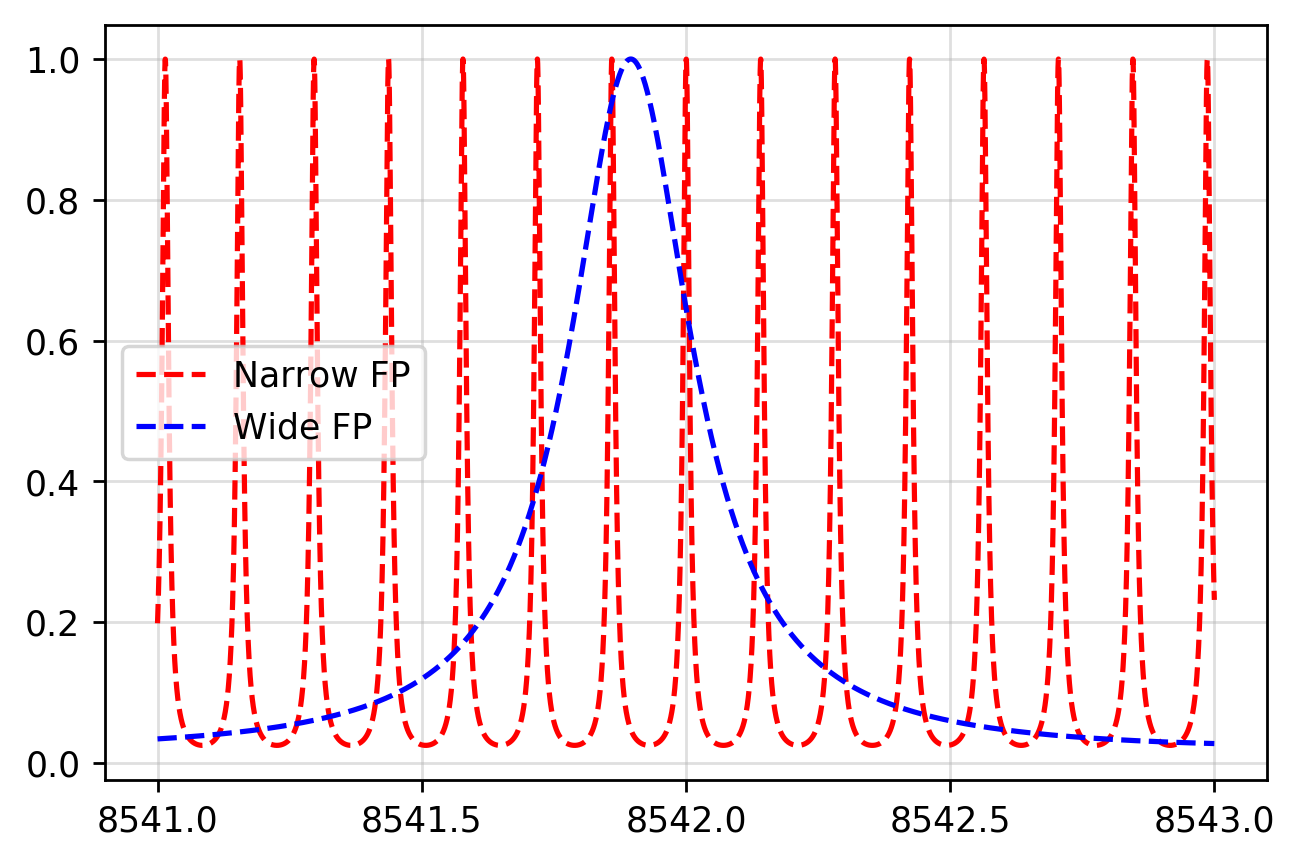

The free spectral range is: 1.4082648203488775e-11


In [92]:
wave_start = 8541e-10
wave_end   = 8543e-10
d0         = 2.59002e-2
R0         = 0.95
F          = 4 * R0 /(1 - R0**2)

d1         = d0 / (np.pi * np.sqrt(F))

waves = np.linspace(wave_start, wave_end, num=10000)
TP_narrow = fabry_perot_profile(waves, d=d0, R=R0)
TP_wide = fabry_perot_profile(waves, d=d1, R=R0)



plt.figure(dpi=250)


plt.plot(waves*1e10, TP_narrow, 'r--', label='Narrow FP')
plt.plot(waves*1e10, TP_wide, 'b--', label='Wide FP')
plt.locator_params(axis='x', nbins=7)
plt.legend()
plt.grid(alpha=0.4)
plt.show()

print(f'The free spectral range is: {calculate_free_spectral_range(waves[0], d=d0, n=1)}')

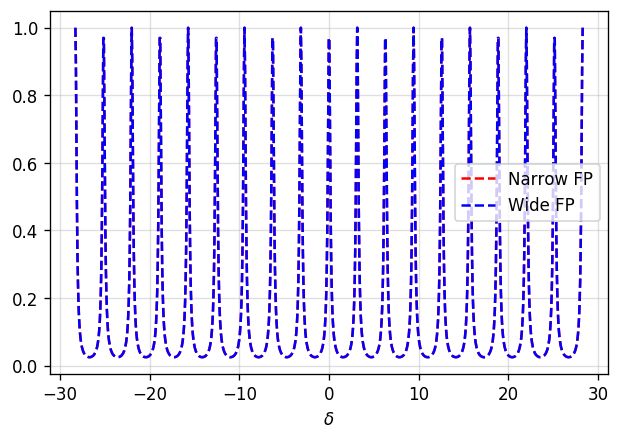

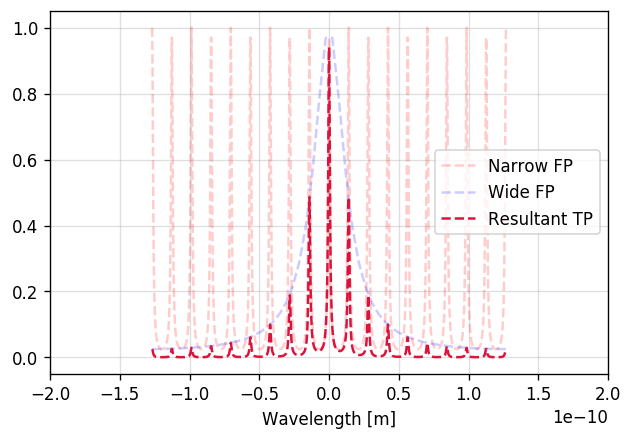

The free spectral range is: 1.4082648203488775e-11


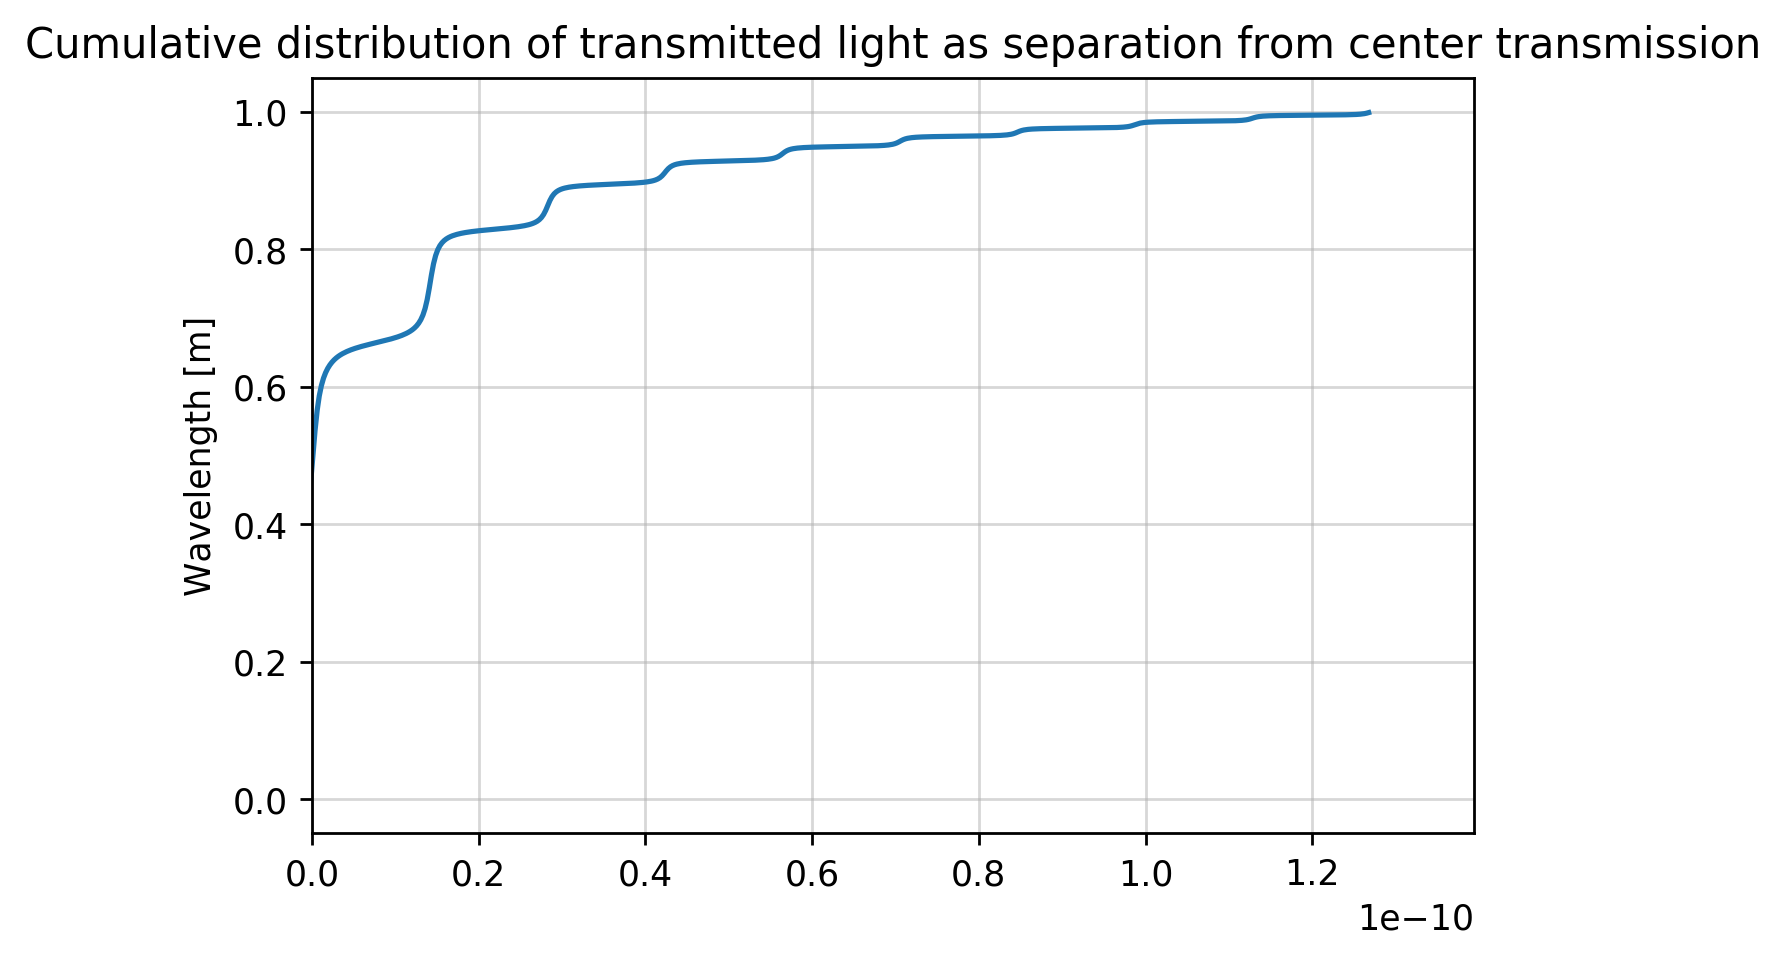

In [128]:
wave_start = 8541e-10
wave_end   = 8543e-10
d0         = 2.59002e-2
R0         = 0.95
F          = 4 * R0 /(1 - R0**2)
resolution = 1000

d1         = d0 / (np.pi * np.sqrt(F))

deltas    = np.linspace(-9*np.pi, 9*np.pi, num=resolution)
waves     = np.linspace(wave_start, wave_end, num=resolution)
TP_narrow = fabry_perot_profile_delta(deltas, R=R0)
TP_wide   = fabry_perot_profile_delta(deltas, R=R0)

plt.figure(dpi=120)

plt.plot(deltas, TP_narrow, 'r--', label='Narrow FP')
plt.plot(deltas, TP_wide, 'b--', label='Wide FP')
#plt.locator_params(axis='x', nbins=7)
plt.legend()
plt.grid(alpha=0.4)
plt.xlabel('$\delta$')
plt.show()

wavescale_narrow = convert_delta_wavescale(deltas, 8542e-10, d0)
wavescale_wide   = convert_delta_wavescale(deltas, 8542e-10, 1.05*d1)

TP_wide_interp = np.interp(wavescale_narrow, wavescale_wide, TP_wide)

plt.figure(dpi=120)

TP_effective = TP_wide_interp*TP_narrow

plt.plot(wavescale_narrow, TP_narrow, 'r--', label='Narrow FP', alpha=0.2)
plt.plot(wavescale_narrow, TP_wide_interp, 'b--', label='Wide FP', alpha=0.2)
plt.plot(wavescale_narrow, TP_effective, '--', color='crimson',
         label='Resultant TP')
#plt.locator_params(axis='x', nbins=7)
plt.legend()
plt.grid(alpha=0.4)
plt.xlim(-2e-10, 2e-10)
plt.xlabel('Wavelength [m]')
plt.show()


print(f'The free spectral range is: {calculate_free_spectral_range(waves[0], d=d0, n=1)}')

#Calculate the cumulative energy throughput 

I_cumulative = np.zeros(resolution)
for ii in range(resolution):
    I_cumulative[ii] = np.sum(TP_effective[0:ii])*2/np.sum(TP_effective)

plt.figure(dpi=250)
plt.plot(wavescale_narrow, I_cumulative/2)
plt.grid(alpha=0.5)
plt.title('Cumulative distribution of transmitted light as separation from center transmission')
plt.ylabel('Wavelength [m]')
plt.xlim(0,)
plt.show()

In [129]:
np.savez('Instrument_transmission_profile.npz', wavescale = wavescale_narrow, TP = TP_effective)